In [1]:
import os
import torch
import torch.nn as nn 
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch.optim as optim

from baseline.utils import *
from baseline.training import training

from baseline.models.encoder import Encoder
from baseline.models.linear_classifier import LinearClassifier, TwoLayersClassifier
from baseline.models.simclr import SupCon


In [2]:
train_data, test_data = get_data()
train_unlabeled_loader, train_labeled_loader, test_loader = get_loader(train_data, test_data, batch_size=50)
device = get_device()

 <function is_available at 0x0000026D0F1B2E50> and can be used by 1 devices
The device used is NVIDIA GeForce GTX 1050


In [3]:
encoder = Encoder()
model = SupCon(encoder, head='mlp', feat_dim=128)
PATH = './SIMCLR/batch_size_64/pre_trained_supcon_64.pth'
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [4]:
for name, param in model.named_parameters():
    param.requires_grad = False

In [5]:
for name, param in model.named_parameters():print(name, param.requires_grad)

encoder.layer1.0.weight False
encoder.layer1.0.bias False
encoder.layer1.1.weight False
encoder.layer1.1.bias False
encoder.layer2.0.weight False
encoder.layer2.0.bias False
encoder.layer2.1.weight False
encoder.layer2.1.bias False
encoder.layer3.0.weight False
encoder.layer3.0.bias False
encoder.layer3.1.weight False
encoder.layer3.1.bias False
head.0.weight False
head.0.bias False
head.2.weight False
head.2.bias False


In [6]:
classifier = LinearClassifier()
#classifier = TwoLayersClassifier()
model.head = classifier

In [7]:
output_fn = torch.nn.Softmax(dim=1)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-3)

In [8]:
epochs = 25
train_class = training(train_loader=train_labeled_loader, val_loader=test_loader, metric=get_accuracy, device=device)
train_class.train(model=model, epochs=epochs, optimizer=optimizer, criterion=criterion, output_fn=output_fn, RGB = False, patience_LR = 3, patience_earlystop = 5)

  4%|▍         | 1/25 [00:16<06:46, 16.93s/it]

| Epoch: 1/25 | Train: Loss 1.9922 Accuracy : 0.4700 | Val: Loss 2.0618 Accuracy : 0.3836



  8%|▊         | 2/25 [00:23<04:10, 10.90s/it]

| Epoch: 2/25 | Train: Loss 1.8081 Accuracy : 0.7600 | Val: Loss 1.9033 Accuracy : 0.6186



 12%|█▏        | 3/25 [00:29<03:09,  8.60s/it]

| Epoch: 3/25 | Train: Loss 1.7114 Accuracy : 0.9000 | Val: Loss 1.8150 Accuracy : 0.7293



 16%|█▌        | 4/25 [00:35<02:41,  7.68s/it]

| Epoch: 4/25 | Train: Loss 1.6534 Accuracy : 0.9300 | Val: Loss 1.7621 Accuracy : 0.7974



 20%|██        | 5/25 [00:41<02:22,  7.14s/it]

| Epoch: 5/25 | Train: Loss 1.6203 Accuracy : 0.9700 | Val: Loss 1.7328 Accuracy : 0.8340



 24%|██▍       | 6/25 [00:48<02:10,  6.88s/it]

| Epoch: 6/25 | Train: Loss 1.5902 Accuracy : 0.9900 | Val: Loss 1.7056 Accuracy : 0.8599



 28%|██▊       | 7/25 [00:54<02:00,  6.72s/it]

| Epoch: 7/25 | Train: Loss 1.5667 Accuracy : 0.9900 | Val: Loss 1.6841 Accuracy : 0.8821



 32%|███▏      | 8/25 [01:00<01:50,  6.49s/it]

| Epoch: 8/25 | Train: Loss 1.5512 Accuracy : 0.9900 | Val: Loss 1.6706 Accuracy : 0.8922



 36%|███▌      | 9/25 [01:07<01:45,  6.60s/it]

| Epoch: 9/25 | Train: Loss 1.5391 Accuracy : 0.9900 | Val: Loss 1.6611 Accuracy : 0.9010



 40%|████      | 10/25 [01:14<01:41,  6.74s/it]

| Epoch: 10/25 | Train: Loss 1.5284 Accuracy : 0.9900 | Val: Loss 1.6534 Accuracy : 0.9055



 44%|████▍     | 11/25 [01:21<01:34,  6.77s/it]

| Epoch: 11/25 | Train: Loss 1.5197 Accuracy : 0.9900 | Val: Loss 1.6476 Accuracy : 0.9079



 48%|████▊     | 12/25 [01:28<01:28,  6.82s/it]

| Epoch: 12/25 | Train: Loss 1.5122 Accuracy : 0.9900 | Val: Loss 1.6425 Accuracy : 0.9100



 52%|█████▏    | 13/25 [01:34<01:21,  6.77s/it]

| Epoch: 13/25 | Train: Loss 1.5056 Accuracy : 1.0000 | Val: Loss 1.6375 Accuracy : 0.9118



 56%|█████▌    | 14/25 [01:41<01:12,  6.59s/it]

| Epoch: 14/25 | Train: Loss 1.4989 Accuracy : 1.0000 | Val: Loss 1.6326 Accuracy : 0.9133



 60%|██████    | 15/25 [01:47<01:04,  6.45s/it]

| Epoch: 15/25 | Train: Loss 1.4913 Accuracy : 1.0000 | Val: Loss 1.6272 Accuracy : 0.9149



 64%|██████▍   | 16/25 [01:53<00:57,  6.37s/it]

| Epoch: 16/25 | Train: Loss 1.4856 Accuracy : 1.0000 | Val: Loss 1.6239 Accuracy : 0.9156



 68%|██████▊   | 17/25 [01:59<00:50,  6.32s/it]

| Epoch: 17/25 | Train: Loss 1.4817 Accuracy : 1.0000 | Val: Loss 1.6227 Accuracy : 0.9158



 72%|███████▏  | 18/25 [02:05<00:43,  6.28s/it]

| Epoch: 18/25 | Train: Loss 1.4787 Accuracy : 1.0000 | Val: Loss 1.6219 Accuracy : 0.9162



 76%|███████▌  | 19/25 [02:12<00:37,  6.25s/it]

| Epoch: 19/25 | Train: Loss 1.4764 Accuracy : 1.0000 | Val: Loss 1.6216 Accuracy : 0.9175



 80%|████████  | 20/25 [02:18<00:31,  6.33s/it]

| Epoch: 20/25 | Train: Loss 1.4731 Accuracy : 1.0000 | Val: Loss 1.6196 Accuracy : 0.9185



 84%|████████▍ | 21/25 [02:26<00:26,  6.67s/it]

| Epoch: 21/25 | Train: Loss 1.4687 Accuracy : 1.0000 | Val: Loss 1.6167 Accuracy : 0.9193



 88%|████████▊ | 22/25 [02:32<00:19,  6.58s/it]

| Epoch: 22/25 | Train: Loss 1.4649 Accuracy : 1.0000 | Val: Loss 1.6144 Accuracy : 0.9192



 92%|█████████▏| 23/25 [02:38<00:12,  6.37s/it]

| Epoch: 23/25 | Train: Loss 1.4624 Accuracy : 1.0000 | Val: Loss 1.6134 Accuracy : 0.9170



 96%|█████████▌| 24/25 [02:43<00:06,  6.16s/it]

| Epoch: 24/25 | Train: Loss 1.4596 Accuracy : 1.0000 | Val: Loss 1.6122 Accuracy : 0.9162



100%|██████████| 25/25 [02:50<00:00,  6.83s/it]

| Epoch: 25/25 | Train: Loss 1.4570 Accuracy : 1.0000 | Val: Loss 1.6112 Accuracy : 0.9173



In [9]:
train_class.loss_valid[epochs-1]

1.6112340235710143

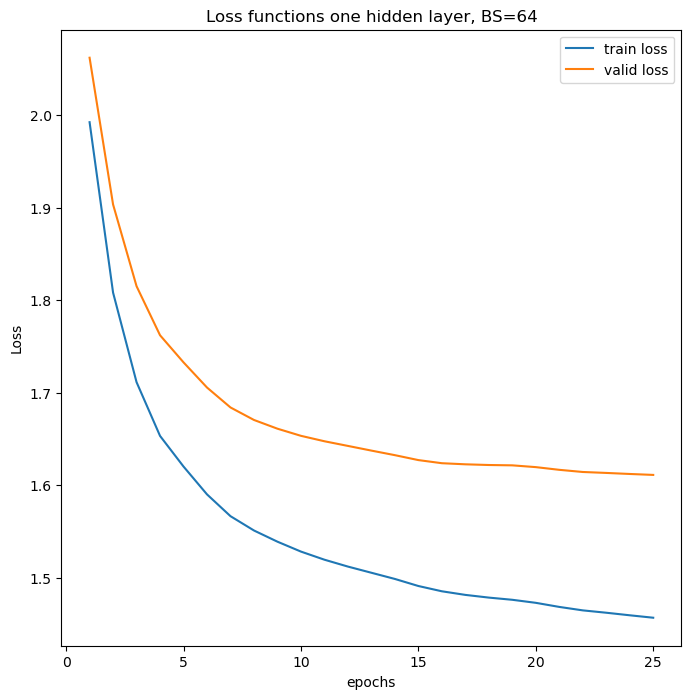

In [10]:
plt.figure(figsize=(8,8))

plt.plot(range(1,epochs + 1), train_class.loss_train, label="train loss" )
plt.plot(range(1, epochs +1), train_class.loss_valid, label="valid loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Loss functions one hidden layer, BS=64")
plt.legend()

plt.savefig("Loss function OWL BS=64.png")
plt.show()

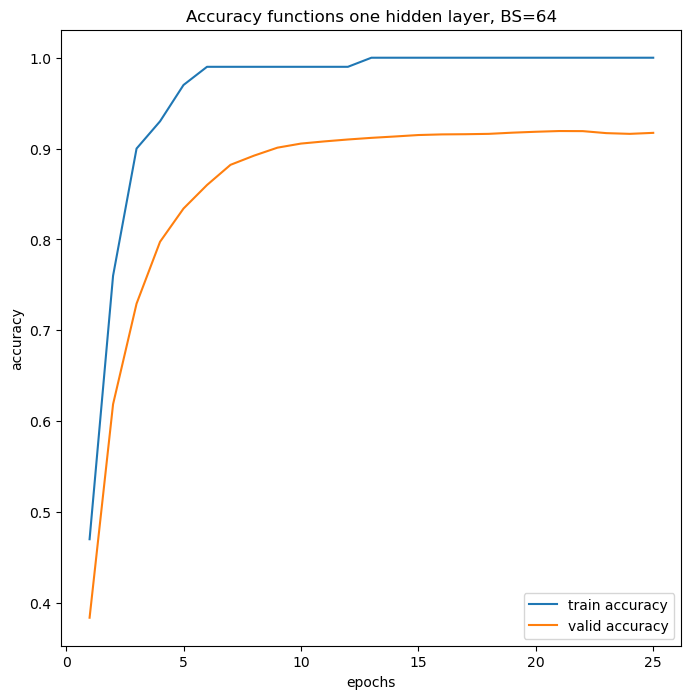

In [11]:
plt.figure(figsize=(8,8))

plt.plot(range(1,epochs + 1), train_class.acc_train, label="train accuracy" )
plt.plot(range(1, epochs +1), train_class.acc_valid, label="valid accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy functions one hidden layer, BS=64")
plt.legend()

plt.savefig("Accuracy function OWL BS=64.png")

In [12]:

accuracy_list = [train_class.acc_valid[epochs-1]]
for k in range(2):
    encoder = Encoder()
    model = SupCon(encoder, head='mlp', feat_dim=128)
    PATH = './SIMCLR/batch_size_64/pre_trained_supcon_64.pth'
    model.load_state_dict(torch.load(PATH))
    for name, param in model.named_parameters():
        param.requires_grad = False
    classifier = LinearClassifier()
    #classifier = TwoLayersClassifier()
    model.head = classifier
    output_fn = torch.nn.Softmax(dim=1)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-3)
    epochs = 25
    train_class = training(train_loader=train_labeled_loader, val_loader=test_loader, metric=get_accuracy, device=device)
    train_class.train(model=model, epochs=epochs, optimizer=optimizer, criterion=criterion, output_fn=output_fn, RGB = False, patience_LR = 3, patience_earlystop = 5)
    accuracy_list.append(train_class.acc_valid[epochs-1])
    

  4%|▍         | 1/25 [00:06<02:29,  6.25s/it]

| Epoch: 1/25 | Train: Loss 2.1542 Accuracy : 0.3500 | Val: Loss 2.1834 Accuracy : 0.2643



  8%|▊         | 2/25 [00:11<02:14,  5.83s/it]

| Epoch: 2/25 | Train: Loss 1.9063 Accuracy : 0.6000 | Val: Loss 1.9833 Accuracy : 0.4984



 12%|█▏        | 3/25 [00:17<02:04,  5.64s/it]

| Epoch: 3/25 | Train: Loss 1.7395 Accuracy : 0.8600 | Val: Loss 1.8429 Accuracy : 0.6782



 16%|█▌        | 4/25 [00:22<01:52,  5.37s/it]

| Epoch: 4/25 | Train: Loss 1.6743 Accuracy : 0.9600 | Val: Loss 1.7831 Accuracy : 0.7875



 20%|██        | 5/25 [00:27<01:48,  5.41s/it]

| Epoch: 5/25 | Train: Loss 1.6358 Accuracy : 0.9800 | Val: Loss 1.7479 Accuracy : 0.8301



 24%|██▍       | 6/25 [00:32<01:42,  5.39s/it]

| Epoch: 6/25 | Train: Loss 1.6108 Accuracy : 0.9800 | Val: Loss 1.7274 Accuracy : 0.8454



 28%|██▊       | 7/25 [00:38<01:37,  5.39s/it]

| Epoch: 7/25 | Train: Loss 1.5923 Accuracy : 0.9700 | Val: Loss 1.7128 Accuracy : 0.8481



 32%|███▏      | 8/25 [00:43<01:31,  5.39s/it]

| Epoch: 8/25 | Train: Loss 1.5726 Accuracy : 0.9700 | Val: Loss 1.6966 Accuracy : 0.8558



 36%|███▌      | 9/25 [00:49<01:27,  5.47s/it]

| Epoch: 9/25 | Train: Loss 1.5530 Accuracy : 0.9800 | Val: Loss 1.6790 Accuracy : 0.8673



 40%|████      | 10/25 [00:55<01:24,  5.62s/it]

| Epoch: 10/25 | Train: Loss 1.5360 Accuracy : 0.9800 | Val: Loss 1.6635 Accuracy : 0.8822



 44%|████▍     | 11/25 [01:00<01:14,  5.34s/it]

| Epoch: 11/25 | Train: Loss 1.5232 Accuracy : 0.9800 | Val: Loss 1.6510 Accuracy : 0.8954



 48%|████▊     | 12/25 [01:04<01:06,  5.15s/it]

| Epoch: 12/25 | Train: Loss 1.5151 Accuracy : 0.9800 | Val: Loss 1.6429 Accuracy : 0.9040



 52%|█████▏    | 13/25 [01:09<01:00,  5.06s/it]

| Epoch: 13/25 | Train: Loss 1.5107 Accuracy : 0.9800 | Val: Loss 1.6389 Accuracy : 0.9096



 56%|█████▌    | 14/25 [01:14<00:54,  4.96s/it]

| Epoch: 14/25 | Train: Loss 1.5063 Accuracy : 0.9900 | Val: Loss 1.6358 Accuracy : 0.9137



 60%|██████    | 15/25 [01:18<00:48,  4.83s/it]

| Epoch: 15/25 | Train: Loss 1.5009 Accuracy : 0.9900 | Val: Loss 1.6329 Accuracy : 0.9145



 64%|██████▍   | 16/25 [01:23<00:42,  4.73s/it]

| Epoch: 16/25 | Train: Loss 1.4946 Accuracy : 0.9900 | Val: Loss 1.6293 Accuracy : 0.9147



 68%|██████▊   | 17/25 [01:27<00:37,  4.67s/it]

| Epoch: 17/25 | Train: Loss 1.4874 Accuracy : 0.9900 | Val: Loss 1.6250 Accuracy : 0.9152



 72%|███████▏  | 18/25 [01:32<00:32,  4.64s/it]

| Epoch: 18/25 | Train: Loss 1.4817 Accuracy : 0.9900 | Val: Loss 1.6218 Accuracy : 0.9171



 76%|███████▌  | 19/25 [01:37<00:29,  4.88s/it]

| Epoch: 19/25 | Train: Loss 1.4773 Accuracy : 1.0000 | Val: Loss 1.6194 Accuracy : 0.9186



 80%|████████  | 20/25 [01:44<00:26,  5.35s/it]

| Epoch: 20/25 | Train: Loss 1.4740 Accuracy : 1.0000 | Val: Loss 1.6177 Accuracy : 0.9200



 84%|████████▍ | 21/25 [01:49<00:21,  5.34s/it]

| Epoch: 21/25 | Train: Loss 1.4711 Accuracy : 1.0000 | Val: Loss 1.6159 Accuracy : 0.9213



 88%|████████▊ | 22/25 [01:54<00:15,  5.32s/it]

| Epoch: 22/25 | Train: Loss 1.4691 Accuracy : 1.0000 | Val: Loss 1.6148 Accuracy : 0.9206



 92%|█████████▏| 23/25 [02:00<00:10,  5.33s/it]

| Epoch: 23/25 | Train: Loss 1.4674 Accuracy : 1.0000 | Val: Loss 1.6143 Accuracy : 0.9210



 96%|█████████▌| 24/25 [02:05<00:05,  5.30s/it]

| Epoch: 24/25 | Train: Loss 1.4653 Accuracy : 1.0000 | Val: Loss 1.6138 Accuracy : 0.9233



100%|██████████| 25/25 [02:10<00:00,  5.23s/it]


| Epoch: 25/25 | Train: Loss 1.4623 Accuracy : 1.0000 | Val: Loss 1.6121 Accuracy : 0.9237



  4%|▍         | 1/25 [00:05<02:05,  5.24s/it]

| Epoch: 1/25 | Train: Loss 2.0255 Accuracy : 0.4400 | Val: Loss 2.0794 Accuracy : 0.3573



  8%|▊         | 2/25 [00:10<01:59,  5.18s/it]

| Epoch: 2/25 | Train: Loss 1.8397 Accuracy : 0.7400 | Val: Loss 1.9285 Accuracy : 0.6129



 12%|█▏        | 3/25 [00:15<01:53,  5.14s/it]

| Epoch: 3/25 | Train: Loss 1.7298 Accuracy : 0.9100 | Val: Loss 1.8349 Accuracy : 0.7318



 16%|█▌        | 4/25 [00:20<01:47,  5.13s/it]

| Epoch: 4/25 | Train: Loss 1.6705 Accuracy : 0.9600 | Val: Loss 1.7803 Accuracy : 0.8043



 20%|██        | 5/25 [00:25<01:42,  5.12s/it]

| Epoch: 5/25 | Train: Loss 1.6320 Accuracy : 0.9600 | Val: Loss 1.7448 Accuracy : 0.8443



 24%|██▍       | 6/25 [00:30<01:37,  5.11s/it]

| Epoch: 6/25 | Train: Loss 1.5974 Accuracy : 0.9900 | Val: Loss 1.7140 Accuracy : 0.8706



 28%|██▊       | 7/25 [00:36<01:35,  5.31s/it]

| Epoch: 7/25 | Train: Loss 1.5732 Accuracy : 0.9900 | Val: Loss 1.6925 Accuracy : 0.8833



 32%|███▏      | 8/25 [00:41<01:29,  5.27s/it]

| Epoch: 8/25 | Train: Loss 1.5584 Accuracy : 0.9900 | Val: Loss 1.6797 Accuracy : 0.8932



 36%|███▌      | 9/25 [00:46<01:23,  5.21s/it]

| Epoch: 9/25 | Train: Loss 1.5471 Accuracy : 0.9900 | Val: Loss 1.6700 Accuracy : 0.8966



 40%|████      | 10/25 [00:51<01:17,  5.20s/it]

| Epoch: 10/25 | Train: Loss 1.5365 Accuracy : 0.9900 | Val: Loss 1.6614 Accuracy : 0.8991



 44%|████▍     | 11/25 [00:57<01:16,  5.45s/it]

| Epoch: 11/25 | Train: Loss 1.5267 Accuracy : 1.0000 | Val: Loss 1.6538 Accuracy : 0.9024



 48%|████▊     | 12/25 [01:03<01:11,  5.52s/it]

| Epoch: 12/25 | Train: Loss 1.5174 Accuracy : 1.0000 | Val: Loss 1.6473 Accuracy : 0.9040



 52%|█████▏    | 13/25 [01:09<01:07,  5.60s/it]

| Epoch: 13/25 | Train: Loss 1.5081 Accuracy : 1.0000 | Val: Loss 1.6409 Accuracy : 0.9070



 56%|█████▌    | 14/25 [01:15<01:02,  5.65s/it]

| Epoch: 14/25 | Train: Loss 1.4991 Accuracy : 1.0000 | Val: Loss 1.6351 Accuracy : 0.9104



 60%|██████    | 15/25 [01:21<00:58,  5.87s/it]

| Epoch: 15/25 | Train: Loss 1.4918 Accuracy : 1.0000 | Val: Loss 1.6305 Accuracy : 0.9129



 64%|██████▍   | 16/25 [01:27<00:53,  5.89s/it]

| Epoch: 16/25 | Train: Loss 1.4874 Accuracy : 1.0000 | Val: Loss 1.6282 Accuracy : 0.9146



 68%|██████▊   | 17/25 [01:33<00:47,  6.00s/it]

| Epoch: 17/25 | Train: Loss 1.4842 Accuracy : 1.0000 | Val: Loss 1.6269 Accuracy : 0.9122



 72%|███████▏  | 18/25 [01:39<00:41,  5.94s/it]

| Epoch: 18/25 | Train: Loss 1.4803 Accuracy : 1.0000 | Val: Loss 1.6250 Accuracy : 0.9119



 76%|███████▌  | 19/25 [01:45<00:35,  5.91s/it]

| Epoch: 19/25 | Train: Loss 1.4759 Accuracy : 1.0000 | Val: Loss 1.6229 Accuracy : 0.9141



 80%|████████  | 20/25 [01:51<00:29,  5.83s/it]

| Epoch: 20/25 | Train: Loss 1.4712 Accuracy : 1.0000 | Val: Loss 1.6206 Accuracy : 0.9166



 84%|████████▍ | 21/25 [01:57<00:23,  6.00s/it]

| Epoch: 21/25 | Train: Loss 1.4677 Accuracy : 1.0000 | Val: Loss 1.6195 Accuracy : 0.9169



 88%|████████▊ | 22/25 [02:03<00:17,  5.98s/it]

| Epoch: 22/25 | Train: Loss 1.4644 Accuracy : 1.0000 | Val: Loss 1.6180 Accuracy : 0.9178



 92%|█████████▏| 23/25 [02:09<00:11,  5.93s/it]

| Epoch: 23/25 | Train: Loss 1.4610 Accuracy : 1.0000 | Val: Loss 1.6162 Accuracy : 0.9184



 96%|█████████▌| 24/25 [02:14<00:05,  5.86s/it]

| Epoch: 24/25 | Train: Loss 1.4585 Accuracy : 1.0000 | Val: Loss 1.6150 Accuracy : 0.9170



100%|██████████| 25/25 [02:21<00:00,  5.65s/it]

| Epoch: 25/25 | Train: Loss 1.4569 Accuracy : 1.0000 | Val: Loss 1.6143 Accuracy : 0.9173



In [13]:
print(f"the mean is {np.mean(accuracy_list)}")
print(f"the std is {np.std(accuracy_list)}")

the mean is 0.9194333333333334
the std is 0.0030169889330625846
